# **train_test_split in Scikit-Learn**

In [16]:
from sklearn.model_selection import train_test_split

X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

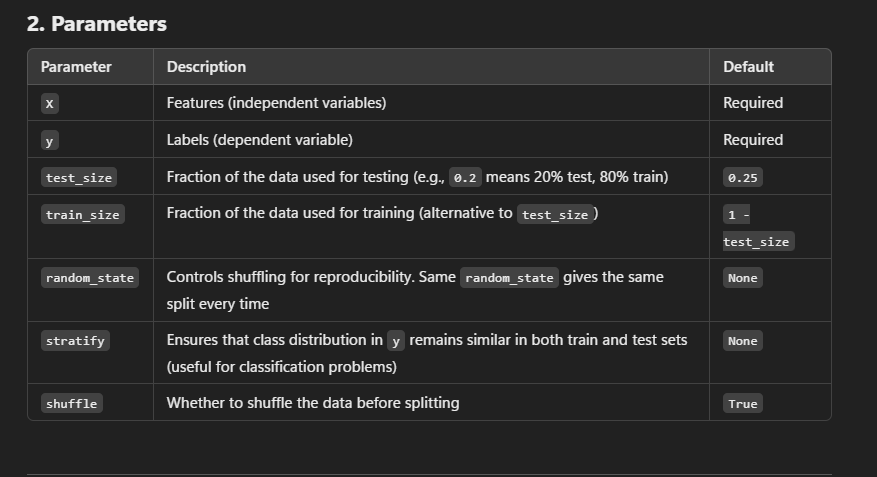

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Creating a sample dataset
data = pd.DataFrame({
    "square_feet": [1500, 1800, 1200, 2000, 1700, 1600, 1100, 2100],
    "num_bedrooms": [3, 4, 2, 5, 3, 2, 1, 5],
    "price": [300000, 350000, 250000, 450000, 330000, 280000, 220000, 470000]
})

# Splitting features (X) and labels (y)
X = data.drop(columns=["price"])  # Features: square_feet, num_bedrooms
y = data["price"]  # Target variable: price

# Splitting into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying results
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

print("\nTraining Data (X_train):\n", X_train)
print("\nTesting Data (X_test):\n", X_test)

Training set size: 6 rows
Testing set size: 2 rows

Training Data (X_train):
    square_feet  num_bedrooms
0         1500             3
7         2100             5
2         1200             2
4         1700             3
3         2000             5
6         1100             1

Testing Data (X_test):
    square_feet  num_bedrooms
1         1800             4
5         1600             2


In [23]:
# Splitting again with random_state = 42
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting again with a different random_state
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=7)

# The first split will be the same, but the second one will be different
print("\nX_train1 (with random_state=42):\n", X_train1)
print("\nX_train2 (with random_state=7):\n", X_train2)  # This will be different


X_train1 (with random_state=42):
    square_feet  num_bedrooms
0         1500             3
7         2100             5
2         1200             2
4         1700             3
3         2000             5
6         1100             1

X_train2 (with random_state=7):
    square_feet  num_bedrooms
0         1500             3
6         1100             1
3         2000             5
1         1800             4
4         1700             3
7         2100             5


### **Why Use `random_state`?**  

In [27]:
from sklearn.model_selection import train_test_split

X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

# Splitting multiple times without setting random_state
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

print("First Split X_train:", X_train1)
print("Second Split X_train:", X_train2)  # Different result each time


First Split X_train: [5, 2, 3, 8, 1, 6, 10, 4]
Second Split X_train: [10, 9, 1, 5, 3, 8, 2, 4]


💡 **Problem:**

**Fixing the Issue with `random_state`**

In [4]:
# Using random_state to get a consistent split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

print("First Split X_train:", X_train1)
print("Second Split X_train:", X_train2)  # Now, the same result every time!


First Split X_train: [6, 1, 8, 3, 10, 5, 4, 7]
Second Split X_train: [6, 1, 8, 3, 10, 5, 4, 7]


**Why `random_state=42`?**
- The number **42** itself has no special meaning in machine learning.  
- It’s just a commonly used value by data scientists (inspired by *The Hitchhiker’s Guide to the Galaxy* 📖).  
- You can use **any number** (e.g., `random_state=7` or `random_state=100`), but using the **same number** ensures consistency.  

**When to Use `random_state`?**
- **✅ Always use it when working on a project** to ensure results are reproducible.
- **🚫 Don’t use it in real-world deployment** because you want your model to generalize well.

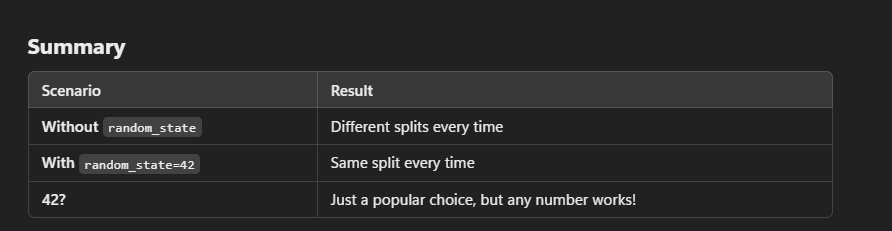

Example: Without Stratification

In [43]:
from collections import Counter
from sklearn.datasets import make_classification

# Generating an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=5, weights=[0.9, 0.1], random_state=42)

# Splitting without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking class distribution
print("Training set class distribution:", Counter(y_train))
print("Testing set class distribution:", Counter(y_test))

Training set class distribution: Counter({0: 710, 1: 90})
Testing set class distribution: Counter({0: 185, 1: 15})


Problem: The class distribution is not preserved, which can lead to biased models.

In [46]:
# Splitting with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking class distribution again
print("Training set class distribution (with stratify):", Counter(y_train))
print("Testing set class distribution (with stratify):", Counter(y_test))

Training set class distribution (with stratify): Counter({0: 716, 1: 84})
Testing set class distribution (with stratify): Counter({0: 179, 1: 21})


✅ Now, the class proportions in train and test sets are the same.

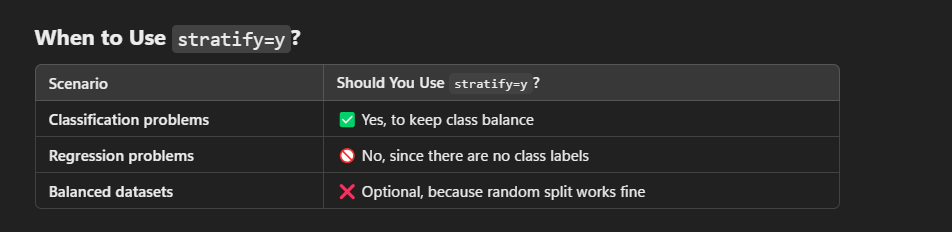

**Common Mistakes**

❌ Forgetting to Split Data
If you train on all data and don't test on unseen data, you cannot evaluate how well the model generalizes.

❌ Not Setting random_state
If you don’t set random_state, the data split will change every time you run the code, making results inconsistent.

❌ Not Using stratify in Classification
If your dataset is imbalanced (e.g., 90% Class A, 10% Class B), using stratify=y ensures both classes are properly represented in training and test sets.

In [5]:
from sklearn.model_selection import train_test_split

X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

# Splitting multiple times without setting random_state
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

print("First Split X_train:", X_train1)
print("Second Split X_train:", X_train2)  # Different result each time

First Split X_train: [6, 9, 3, 8, 10, 4, 1, 5]
Second Split X_train: [2, 8, 5, 1, 9, 7, 6, 4]


In [7]:
# Using random_state to get a consistent split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

print("First Split X_train:", X_train1)
print("Second Split X_train:", X_train2)  # Now, the same result every time!

#With random_state=42, the split will be the same every time you run the code!

First Split X_train: [6, 1, 8, 3, 10, 5, 4, 7]
Second Split X_train: [6, 1, 8, 3, 10, 5, 4, 7]


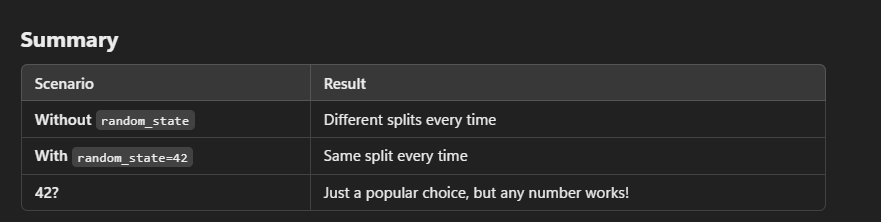

### **Understanding `stratify=y` in `train_test_split`**

💡 **Solution:** Use `stratify=y` to maintain the same class distribution in both sets.

In [14]:
### **Example Without `stratify=y` (Random Split)**

from sklearn.model_selection import train_test_split
import numpy as np

# Sample dataset with imbalanced classes
X = np.array([[i] for i in range(10)])  # Features (dummy numbers)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Labels (5 of class 0, 5 of class 1)

# Random split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Train labels distribution:", np.bincount(y_train))
print("Test labels distribution:", np.bincount(y_test))


Train labels distribution: [4 3]
Test labels distribution: [1 2]


☠️ Here, Class 0 is underrepresented in the test set.

In [16]:
### **Example With `stratify=y` (Balanced Split)**

# Using stratify=y to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Train labels distribution:", np.bincount(y_train))
print("Test labels distribution:", np.bincount(y_test))

Train labels distribution: [3 4]
Test labels distribution: [2 1]


✅ Now, both training and test sets **have the same proportion of Class 0 and Class 1** as the original dataset.

### **When to Use `stratify=y`?**
| Scenario | Should You Use `stratify=y`? |
|----------|------------------------------|
| **Classification problems** | ✅ Yes, to keep class balance |
| **Regression problems** | 🚫 No, since there are no class labels |
| **Balanced datasets** | ❌ Optional, because random split works fine |

### **Summary**
- **`stratify=y`** ensures that the **train and test sets have the same class proportions** as the original dataset.
- Useful when dealing with **imbalanced data** to prevent one class from dominating either split.
- **Not needed for regression problems** since there are no class labels.
